## Problem Statement

Problem Statement and Dataset Reference: https://www.kaggle.com/vikasukani/loan-eligible-dataset
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details exist in the dataset provided.

The dataset covers the following features/variables:
Unique Loan Id\N,
Gender (Male/Female),
Marital Status (Flag whether Married or Not),
Number of Dependents,
Education (Graduate, Unde-Graduate, Post-Graduate, PhD etc.),
Self_Employed flag (Yes / No),
Applicant Income,
Co-Applicant Income,
Loan Amount,
Loan Amount Term (in Months),
Credit History (credit history meets guidelines or not - 1 or 0 etc.),
Property Area (falls in which area - Urban / Semi-Urban / Rural etc.),
Loan Status (Approved Yes or No),


 ##CRISP-DM lifecycle stages will be used to solve the problem.
 
 ## 1. Business Understanding
To understand the Business Goal/Objective:
This is a classification problem  in predict whether a loan would be approved or not for a particular loan application from customer. In a classification problem, we have to predict discrete values based on a given set of independent variable(s).

The business need is to find out what is the goal/objective?
What is supposed to  be perform?
What outcome  is expected?
How does the outcome generated by ML solution benefit the stakeholder in answering the business question?
 

In [1]:
## Importing the desire libraries
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

import warnings
import time


## 2. Data Understanding and EDA

In [2]:
df_train = pd.read_csv('loan-train.csv') ## Loading datasets
df_test = pd.read_csv('loan-test.csv')

In [3]:
df_train.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [4]:
df_test.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## 3. Data Preparation / Feature Engineering
3.1 Convert Categorical to Numeric

In [7]:
df_train.Gender.value_counts(normalize = True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [8]:
df_train.Married.value_counts(normalize = True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [9]:
df_train.Dependents.value_counts(normalize = True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [10]:
df_train.Education.value_counts(normalize = True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [11]:
df_train.Self_Employed.value_counts(normalize = True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [12]:
df_train.Property_Area.value_counts(normalize = True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

In [13]:
df_train.Gender = df_train.Gender.replace({"Male": 1, "Female" : 0})
df_test.Gender = df_test.Gender.replace({"Male": 1, "Female" : 0})

df_train.Married = df_train.Married.replace({"Yes": 1, "No" : 0})
df_test.Married = df_test.Married.replace({"Yes": 1, "No" : 0})

df_train.Dependents = df_train.Dependents.replace({"0": 0, "1" : 1, "2" : 2, "3+" : 3})
df_test.Dependents = df_test.Dependents.replace({"0": 0, "1" : 1, "2" : 2, "3+" : 3})

df_train.Education = df_train.Education.replace({"Graduate": 1, "Not Graduate" : 0})
df_test.Education = df_test.Education.replace({"Graduate": 1, "Not Graduate" : 0})

df_train.Self_Employed = df_train.Self_Employed.replace({"Yes": 1, "No" : 0})
df_test.Self_Employed = df_test.Self_Employed.replace({"Yes": 1, "No" : 0})

df_train.Property_Area = df_train.Property_Area.replace({"Semiurban": 1, "Urban" : 2, "Rural" : 3})
df_test.Property_Area = df_test.Property_Area.replace({"Semiurban": 1, "Urban" : 2, "Rural" : 3})

In [14]:
df_train.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y


## 3.2 Handling Missing Values

In [15]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)

df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace=True)

df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)

df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)

df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True) # Mean
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True) # Mean

df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0], inplace=True)

df_train['Credit_History'].fillna(df_train['Credit_History'].mean(), inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mean(), inplace=True)

In [17]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,3,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.000000,360.0,1.0,3,Y
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.000000,180.0,1.0,3,Y
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.000000,360.0,1.0,2,Y


In [19]:
# drop Loan_ID field

df_train = df_train.drop(columns=['Loan_ID'])
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,3,N
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,Y
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,Y


## 3.3 Analysis on Categorical & Numerical Features

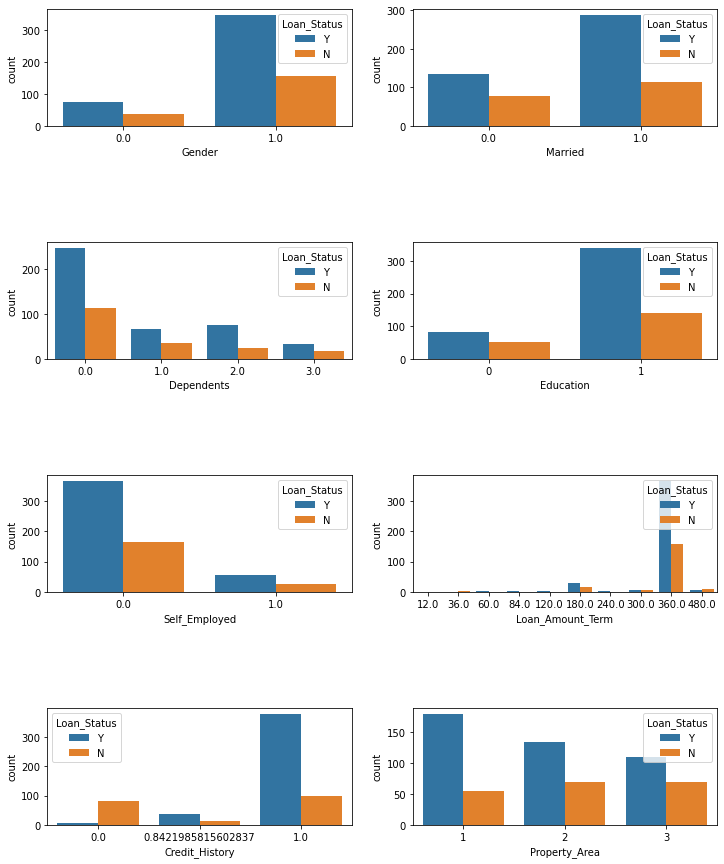

In [20]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                        'Loan_Amount_Term','Credit_History','Property_Area']
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_features):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df_train,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


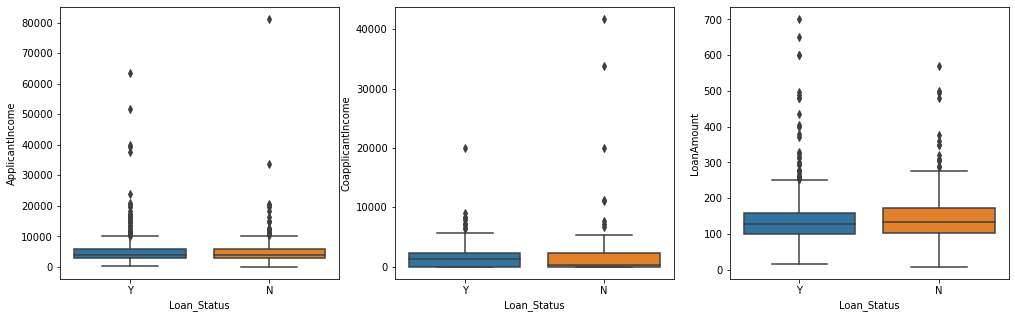

In [21]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_features):
    sns.boxplot(y=cat_col,data=df_train,x='Loan_Status',ax=axes[idx])

print(df_train[numerical_features].describe())
plt.subplots_adjust(hspace=1)

## 3.4 Encoding any other Categorical Features

In [22]:
df_train_encoded = pd.get_dummies(df_train,drop_first=True)
df_train_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


## 3.5 Some visualizations

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('dark')

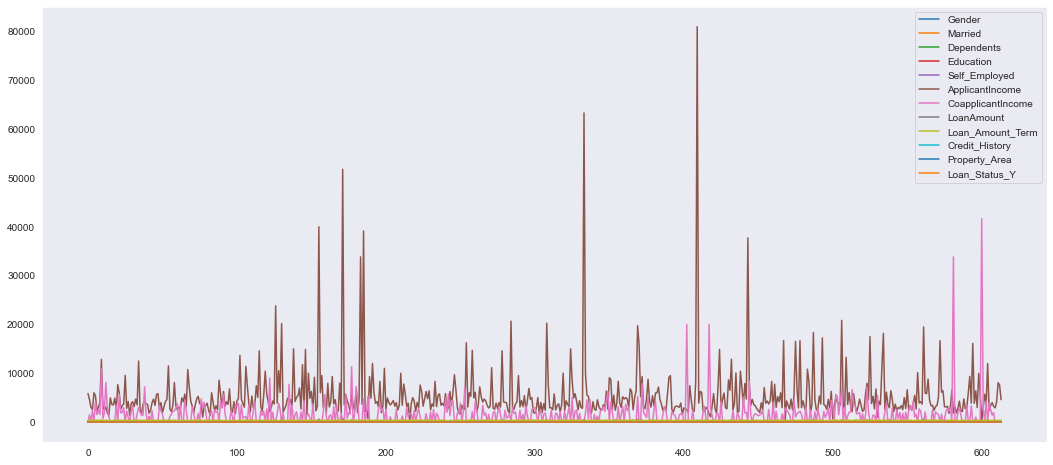

In [24]:
df_train_encoded.plot(figsize=(18, 8))

plt.show()

## Log transformation of the Loan Amount

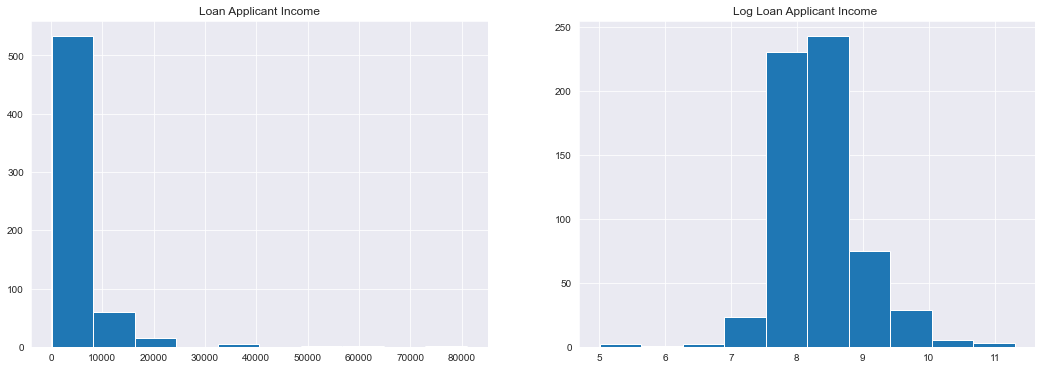

In [25]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)

df_train_encoded['ApplicantIncome'].hist(bins=10)
plt.title("Loan Applicant Income")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(df_train_encoded['ApplicantIncome']))
plt.title("Log Loan Applicant Income ")

plt.show()

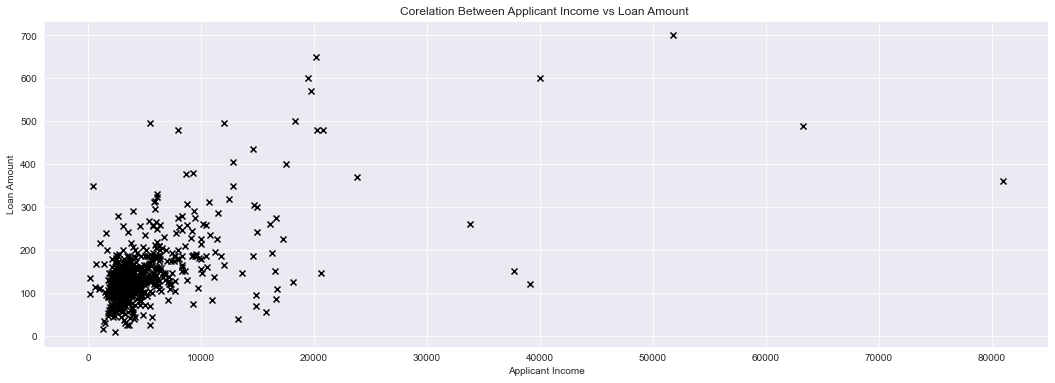

In [26]:
plt.figure(figsize=(18, 6))
plt.title("Corelation Between Applicant Income vs Loan Amount ")

plt.grid()
plt.scatter(df_train_encoded['ApplicantIncome'], df_train_encoded['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

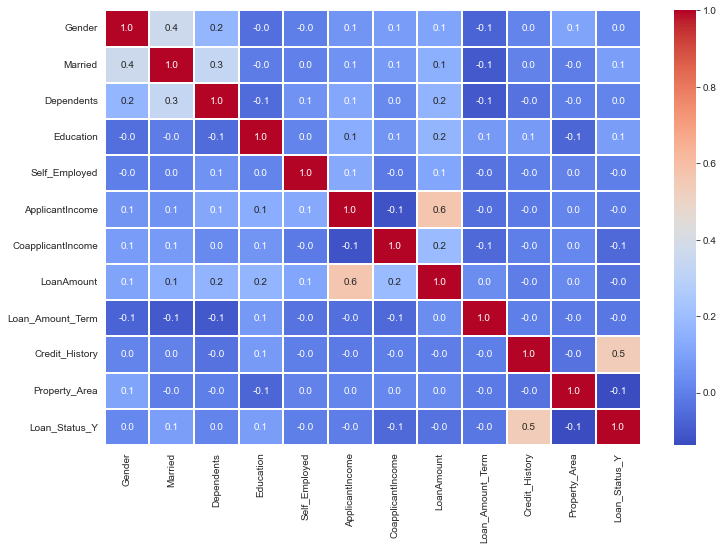

In [27]:
# Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df_train_encoded.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

## 3.7 Pre-processing data for Modeling

In [28]:
df_train_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [29]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status_Y      614 non-null    uint8  
dtypes: float64(8), int64(3), uint8(1)
memory usage: 53.5 KB


In [30]:
X = df_train_encoded.drop("Loan_Status_Y",axis=1)
target = df_train_encoded["Loan_Status_Y"]


In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier      # KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.ensemble import GradientBoostingClassifier # GBM
import xgboost as xgb
from xgboost import XGBClassifier                       # XGBoost

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import ShuffleSplit, GridSearchCV

In [32]:
SEED = 124
x = df_train_encoded.drop("Loan_Status_Y",axis=1)
target = df_train_encoded["Loan_Status_Y"]

x_train,x_test,y_train,y_test = train_test_split(x,target,test_size=0.25,random_state = SEED)

In [33]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

columns_for_scaling = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

df_train_encoded[columns_for_scaling] = standardScaler.fit_transform(df_train_encoded[columns_for_scaling])

In [34]:
x_train.shape

(460, 11)

In [35]:
x_test.shape

(154, 11)

## Modelling

## 4.1 Model 1: k Nearest Neighbour

In [36]:

# Using 10 fold Cross Validation of dataset

knn_scores = []
for k in range(1,21): 
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier,x,target,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

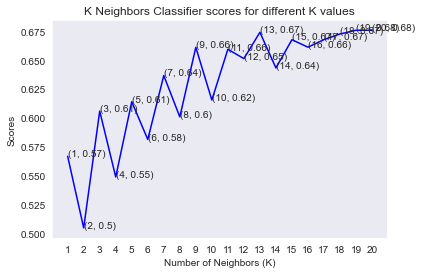

In [37]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'blue')
for i in range(1,21):
    plt.text(i, round(knn_scores[i-1],3), (i, round(knn_scores[i-1],2)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [38]:
# executing with the best k value found above
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
score = cross_val_score(knn_classifier,x,target,cv=10)

In [39]:
score.mean() ## Accuracy score from kNN

0.6154944473823375

## 4.2 Random Forest Classifier

In [40]:
rf_classifier= RandomForestClassifier(n_estimators = 10)
score = cross_val_score(rf_classifier,x,target,cv=10)

score.mean() ## Accuracy score from RF

0.7622950819672132

## 5. Model Evaluation
Using fine tuning of hyper parameters and explore which combinations works in an optimum manner. Based on that those parameter values and re-execute models and evaluate the performance


In [41]:
def print_score(classifier, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = classifier.predict(x_train)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n--------------------------------------------")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = classifier.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n---------------------------------------------")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [42]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,1.0,1.0,0.0,1,0.0,2958,2900.0,131.0,360.0,1.0,1
144,1.0,1.0,2.0,1,0.0,11757,0.0,187.0,180.0,1.0,2
575,1.0,1.0,2.0,1,0.0,3159,461.0,108.0,84.0,1.0,2
23,1.0,1.0,2.0,0,0.0,3365,1917.0,112.0,360.0,0.0,3
404,0.0,0.0,0.0,1,1.0,7441,0.0,194.0,360.0,1.0,3


In [43]:
y_train.head()

90     1
144    1
575    1
23     0
404    0
Name: Loan_Status_Y, dtype: uint8

## 5.1 Hyperparameter Tuning - kNN

In [44]:
knn_classifier = KNeighborsClassifier(n_neighbors=20)
knn_classifier.fit(x_train, y_train)

print_score(knn_classifier, x_train, y_train, x_test, y_test, train=True)
print_score(knn_classifier, x_train, y_train, x_test, y_test, train=False)

Train Result:
--------------------------------------------
Accuracy Score: 70.87%
_______________________________________________
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.641026    0.714964  0.708696    0.677995      0.691658
recall       0.172414    0.955556  0.708696    0.563985      0.708696
f1-score     0.271739    0.817935  0.708696    0.544837      0.645764
support    145.000000  315.000000  0.708696  460.000000    460.000000
_______________________________________________
Confusion Matrix: 
 [[ 25 120]
 [ 14 301]]

Test Result:
---------------------------------------------
Accuracy Score: 67.53%
_______________________________________________
Classification Report:
                   0           1  accuracy   macro avg  weighted avg
precision   0.363636    0.699301  0.675325    0.531469      0.596858
recall      0.085106    0.934579  0.675325    0.509843      0.675325
f1-score    0.137931    0.800000  0.675325   

In [45]:
test_score = accuracy_score(y_test, knn_classifier.predict(x_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(x_train)) * 100

results_df = pd.DataFrame(data=[["Tuned k-Nearest Neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned k-Nearest Neighbors,70.869565,67.532468


In [46]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_classifier = LogisticRegression()

lr_cv = GridSearchCV(lr_classifier, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(x_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_classifier = LogisticRegression(**best_params)

lr_classifier.fit(x_train, y_train)

print_score(lr_classifier, x_train, y_train, x_test, y_test, train=True)
print_score(lr_classifier, x_train, y_train, x_test, y_test, train=False) ## HyperParameter tuning for Logistic Regression

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.23357214690901212, 'solver': 'liblinear'}
Train Result:
--------------------------------------------
Accuracy Score: 80.43%
_______________________________________________
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.923077    0.784810  0.804348    0.853944      0.828394
recall       0.413793    0.984127  0.804348    0.698960      0.804348
f1-score     0.571429    0.873239  0.804348    0.722334      0.778103
support    145.000000  315.000000  0.804348  460.000000    460.000000
_______________________________________________
Confusion Matrix: 
 [[ 60  85]
 [  5 310]]

Test Result:
---------------------------------------------
Accuracy Score: 83.77%
_______________________________________________
Classification Report:
                   0           1  accuracy   macro avg  weighted avg
precision   0.923077    0.820312  0.837662    0.871695

In [47]:
test_score = accuracy_score(y_test, lr_classifier.predict(x_test)) * 100
train_score = accuracy_score(y_train, lr_classifier.predict(x_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

z = results_df.append(tuning_results_df, ignore_index=True)
z

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned k-Nearest Neighbors,70.869565,67.532468
1,Tuned Logistic Regression,80.434783,83.766234


In [48]:
n_estimators = [100]
max_features = ['auto', 'sqrt']
max_depth = [5]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_rf = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_classifier = RandomForestClassifier(random_state = SEED)

rf_cv = GridSearchCV(rf_classifier, params_rf, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)
rf_cv.fit(x_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_classifier = RandomForestClassifier(**best_params)
rf_classifier.fit(x_train, y_train)

print_score(rf_classifier, x_train, y_train, x_test, y_test, train=True)
print_score(rf_classifier, x_train, y_train, x_test, y_test, train=False) ## HyperParameter Tuning for RF

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\Selorm Hodo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Selorm Hodo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Train Result:
--------------------------------------------
Accuracy Score: 80.87%
_______________________________________________
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.925373    0.788804  0.808696    0.857089      0.831853
recall       0.427586    0.984127  0.808696    0.705857      0.808696
f1-score     0.584906    0.875706  0.808696    0.730306      0.784041
support    145.000000  315.000000  0.808696  460.000000    460.000000
_______________________________________________
Confusion Matrix: 
 [[ 62  83]
 [  5 310]]

Test Result:
---------------------------------------------
Accuracy Score: 83.77%
_______________________________________________
Classification Report:
                   0           1  accuracy   macro avg  weighted avg
precision   0.923077    0.820312  0.83

In [49]:
test_score = accuracy_score(y_test, rf_classifier.predict(x_test)) * 100
train_score = accuracy_score(y_train, rf_classifier.predict(x_train)) * 100

results_df = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
z = z.append(results_df, ignore_index=True)
z

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned k-Nearest Neighbors,70.869565,67.532468
1,Tuned Logistic Regression,80.434783,83.766234
2,Tuned Random Forest Classifier,80.869565,83.766234


In [52]:
n_estimators = [100]
max_depth = [2, 3, 5]
booster = ['gbtree', 'gblinear']
base_score = [0.99]
learning_rate = [0.05]
min_child_weight = [1, 2, 3]

params = {
    'n_estimators': n_estimators, 'max_depth': max_depth,
    'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight, 
    'booster' : booster, 'base_score' : base_score
                      }

xgb_classifier = XGBClassifier()

xgb_cv = GridSearchCV(xgb_classifier, params, cv=3, scoring = 'accuracy',n_jobs =-1, verbose=1)


xgb_cv.fit(x_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")
xgb_classifier = XGBClassifier(**best_params)
xgb_classifier.fit(x_train, y_train)

print_score(xgb_classifier, x_train, y_train, x_test, y_test, train=True)
print_score(xgb_classifier, x_train, y_train, x_test, y_test, train=False)       ##  HyperParameter Tuning for XGBoost

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best paramters: {'base_score': 0.99, 'booster': 'gbtree', 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}
Train Result:
--------------------------------------------
Accuracy Score: 80.22%
_______________________________________________
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.909091    0.784264  0.802174    0.846677      0.823612
recall       0.413793    0.980952  0.802174    0.697373      0.802174
f1-score     0.568720    0.871650  0.802174    0.720185      0.776161
support    145.000000  315.000000  0.802174  460.000000    460.000000
_______________________________________________
Confusion Matrix: 
 [[ 60  85]
 [  6 309]]

Test Result:
---------------------------------------------
Accuracy Score: 83.77%
_______________________________________________
Classification Report:
                   0           1  accuracy   macro

In [53]:
test_score = accuracy_score(y_test, xgb_classifier.predict(x_test)) * 100
train_score = accuracy_score(y_train, xgb_classifier.predict(x_train)) * 100

results_df = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
z = z.append(results_df, ignore_index=True)
z

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned k-Nearest Neighbors,70.869565,67.532468
1,Tuned Logistic Regression,80.434783,83.766234
2,Tuned Random Forest Classifier,80.869565,83.766234
3,Tuned XGBoost Classifier,80.217391,83.766234


## Conclusion / Interpretation

## The best performing model is using XGBoost in this context and We will use that model to create pickle file for deployment purposes.

In [55]:
import pickle as pkl

In [56]:
# save the model to disk
filename = 'best_model.pkl'
pkl.dump(xgb_classifier, open(filename, 'wb')) # wb means write as binary

In [57]:
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(x_test, y_test)